# **Object6:-**
 WAP to train and evaluate a Recurrent Neural Network using PyTorch Library to predict the next value in a sample time series dataset.

# **Model Description:-**
 **1. Dataset:**
The model is trained on the International Airline Passengers dataset, which contains monthly totals of airline passengers from January 1949 to December 1960. This classic time series dataset is commonly used for exploring forecasting techniques.

**2. Model Architecture:**
The model is built using a simple Recurrent Neural Network (RNN), designed to handle sequential data. It processes input sequences through an RNN layer to learn patterns and temporal dependencies in the data. After processing the full sequence, the model takes the output from the final time step (assuming it holds the most relevant information) and passes it through a fully connected (linear) layer to generate the final prediction — the number of passengers for the next month.

**3. Training Setup:**

Both input and output are single continuous values, making this a univariate time series regression problem.

The RNN uses 1 recurrent layer with 32 hidden units.

The loss function used is Mean Squared Error (MSE), which measures how close the predictions are to the actual values.

The optimizer is Adam, a popular choice for training deep learning models, set with a learning rate of 0.01.

The model is trained over 120 epochs to allow it to gradually learn and improve its predictions over time.



# **Code Description**

**1. Importing Required Libraries:-**
The code starts by importing essential libraries:

torch and torch.nn: Used to build and train the neural network model.

pandas: For reading and handling the dataset.

numpy: Provides efficient operations for data processing and manipulation.

matplotlib.pyplot: Used to visualize predictions, training loss, and accuracy over time.

MinMaxScaler from scikit-learn: Scales the data to a range between 0 and 1, which helps improve model performance and stability.

**2. Loading and Preprocessing the Data :-**
The dataset, containing monthly totals of international airline passengers, is loaded from a CSV file.
Only the 'Passengers' column is used.
To prepare the data for training, the passenger numbers are normalized using MinMaxScaler to a 0-1 range.

**3. Creating Input Sequences for the RNN :-**
A helper function is defined to generate sequences of a fixed length (in this case, 10).
Each sequence is paired with the next immediate value as the target.
This forms the features (X) and labels (y), which are then converted into PyTorch tensors and reshaped to match the input format expected by the RNN model.

**4. Defining the RNN Model:-**
The model is defined using a custom class that extends the base PyTorch module.
It includes:

An RNN layer that processes sequential input data and learns temporal dependencies.

A fully connected layer that takes the output from the final time step of the sequence and produces the final prediction.

During the forward pass, the input sequence is processed through the RNN, and the output from the last time step is passed to the linear layer to predict the next value.

**5. Training the Model:-**

The loss function used is Mean Squared Error (MSE), which measures the average squared difference between predictions and actual values.

The Adam optimizer is used to update the model parameters with a learning rate of 0.01.

The model is trained for 120 epochs.

In each epoch:

The model makes predictions on the training data.

The loss is computed and backpropagated to update weights.

A custom accuracy metric is calculated using the Mean Absolute Error (MAE) relative to the mean of actual values.

Loss and accuracy values are stored and printed every 10 epochs.

**6. Final Evaluation:-**
After training, the model's predictions are generated and de-normalized to their original scale.
Final performance is measured using both MSE and the custom accuracy metric.
The results are visualized using the following plots:

Predicted vs Actual passenger values

Loss curve over training epochs

Accuracy curve over training epochs

**7.  Confusion Matrix :-**
To give a categorical perspective of the predictions, both actual and predicted values are grouped into ranges (bins), and a confusion matrix is generated.
This helps to see how well the model performs within various passenger count ranges, even though the task is fundamentally regression-based.



Epoch [10/120], Loss: 0.048779, Accuracy: 69.66%
Epoch [20/120], Loss: 0.017891, Accuracy: 81.95%
Epoch [30/120], Loss: 0.009846, Accuracy: 85.32%
Epoch [40/120], Loss: 0.007181, Accuracy: 87.98%
Epoch [50/120], Loss: 0.005064, Accuracy: 90.53%
Epoch [60/120], Loss: 0.003286, Accuracy: 91.83%
Epoch [70/120], Loss: 0.003587, Accuracy: 92.18%
Epoch [80/120], Loss: 0.003084, Accuracy: 92.04%
Epoch [90/120], Loss: 0.003093, Accuracy: 92.16%
Epoch [100/120], Loss: 0.002935, Accuracy: 92.23%
Epoch [110/120], Loss: 0.002860, Accuracy: 92.33%
Epoch [120/120], Loss: 0.002797, Accuracy: 92.35%

Final MSE Loss: 748.7077
Final Custom Accuracy: 92.35%


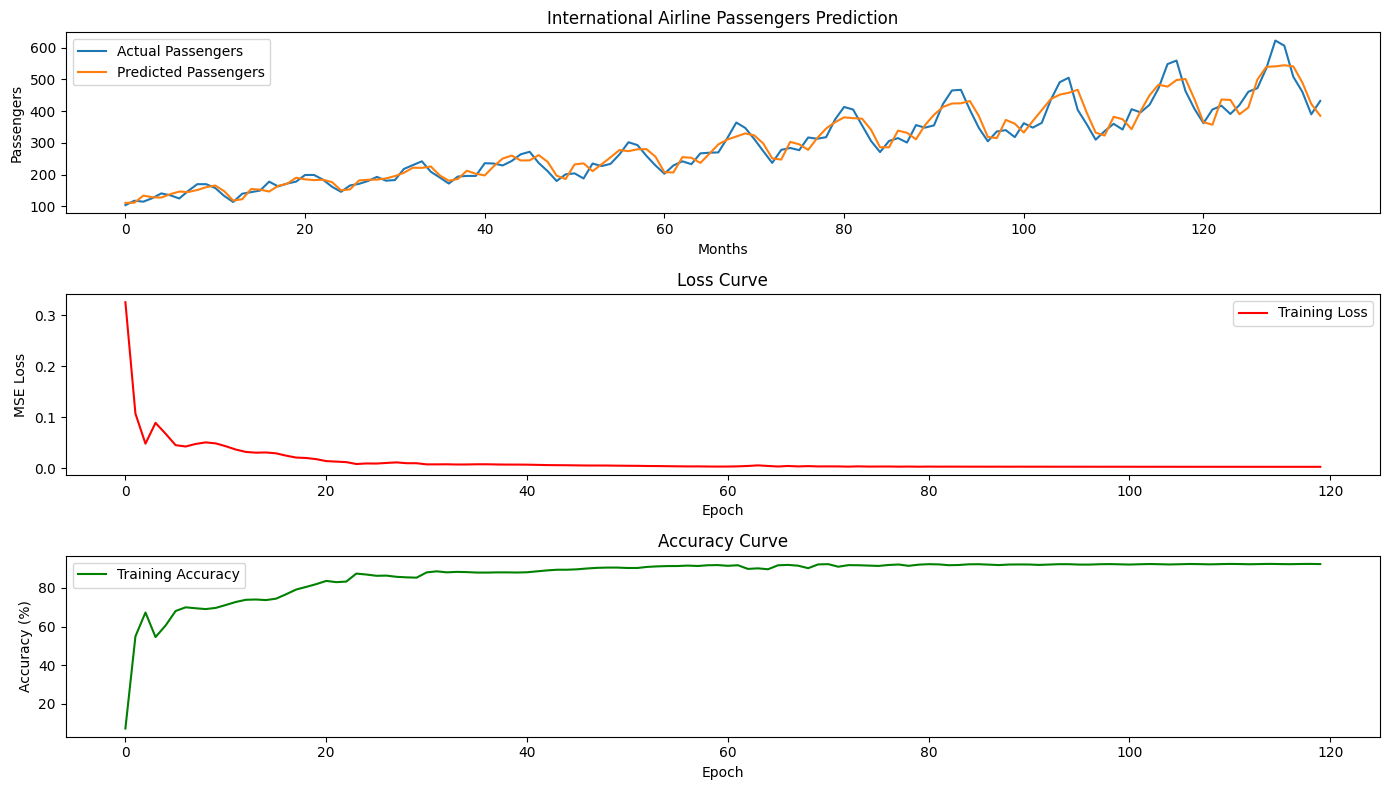

<Figure size 800x600 with 0 Axes>

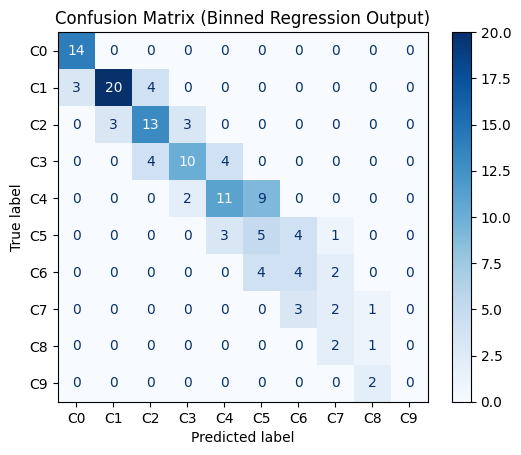

In [3]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Load the dataset using direct URL
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)

# Only 'Passengers' column needed
passengers = data['Passengers'].values.astype(float)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
passengers = scaler.fit_transform(passengers.reshape(-1, 1))

# 2. Create sequences
def create_dataset(series, seq_length):
    X, y = [], []
    for i in range(len(series) - seq_length):
        X.append(series[i:i+seq_length])
        y.append(series[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_dataset(passengers, seq_length)

# Convert to tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()
X = X.view(X.size(0), seq_length, 1)

# 3. Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

# Model setup
input_size = 1
hidden_size = 32
num_layers = 1
output_size = 1
model = RNNModel(input_size, hidden_size, num_layers, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 4. Train the model
num_epochs = 120
losses = []
accuracies = []

for epoch in range(num_epochs):
    model.train()
    outputs = model(X)
    optimizer.zero_grad()
    loss = criterion(outputs.squeeze(), y.squeeze())
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # Calculate custom accuracy
    predicted = outputs.detach().numpy()
    actual = y.detach().numpy()

    predicted = scaler.inverse_transform(predicted)
    actual = scaler.inverse_transform(actual)

    mae = np.mean(np.abs(predicted.flatten() - actual.flatten()))
    mean_actual = np.mean(actual.flatten())
    accuracy = 1 - (mae / mean_actual)

    accuracies.append(accuracy * 100)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}, Accuracy: {accuracy*100:.2f}%')

# 5. Final Evaluation
model.eval()
predicted = model(X).detach().numpy()
actual = y.detach().numpy()

predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(actual)

final_loss = np.mean((predicted.flatten() - actual.flatten())**2)
final_mae = np.mean(np.abs(predicted.flatten() - actual.flatten()))
final_mean_actual = np.mean(actual.flatten())
final_accuracy = 1 - (final_mae / final_mean_actual)

print(f"\nFinal MSE Loss: {final_loss:.4f}")
print(f"Final Custom Accuracy: {final_accuracy*100:.2f}%")

# 6. Plot everything
plt.figure(figsize=(14,8))

# Plot Predictions
plt.subplot(3,1,1)
plt.plot(actual, label='Actual Passengers')
plt.plot(predicted, label='Predicted Passengers')
plt.title('International Airline Passengers Prediction')
plt.xlabel('Months')
plt.ylabel('Passengers')
plt.legend()

# Plot Loss Curve
plt.subplot(3,1,2)
plt.plot(losses, label='Training Loss', color='red')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

# Plot Accuracy Curve
plt.subplot(3,1,3)
plt.plot(accuracies, label='Training Accuracy', color='green')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

# 7. Confusion Matrix for binned output
n_classes = 10
bins = np.linspace(actual.min(), actual.max(), n_classes + 1)

actual_classes = np.digitize(actual.flatten(), bins) - 1
predicted_classes = np.digitize(predicted.flatten(), bins) - 1

# Ensure values stay within class range
actual_classes = np.clip(actual_classes, 0, n_classes - 1)
predicted_classes = np.clip(predicted_classes, 0, n_classes - 1)

# Compute confusion matrix
cm = confusion_matrix(actual_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'C{i}' for i in range(n_classes)])

# Plot
plt.figure(figsize=(8,6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Binned Regression Output)')
plt.show()


# My Comments :-
1. In this model, the entire dataset is passed through the network at once without defining a batch size. This approach is reasonable because the dataset is relatively small and can easily fit into memory. Using the whole dataset in one go helps simplify training without performance issues.
2. I used standard RNN in this model, which is generally suitable for small-scale time series datasets like this one. While RNNs are known to struggle with long sequences or large datasets due to the vanishing gradient problem, they can still perform effectively on shorter sequences where long-term memory they will not perform effectively.
3.To overcome the vanishing gradient issue LSTM (Long short-term memory) are usually preferred. In my model case , switching to LSTM actually resulted in slightly lower accuracy .

4. In this model i got Final MSE Loss: 748.7077
Final Custom Accuracy: 92.35%   
